# Background and Prior Work

After we conclude several factors that are correlated with McDonald's revenues, we are now interested in how does McDonald's act as a saler in the market. 

This published paper suggests us the regional advertising strategies of McDonald's and how consumer's awareness can affect McDonald's strategies. It help us to relate consumer's sentiments with McDonald's regional strategies. 

* Gerhardt, Hazen, and Lewis. (2014) “Small Business Marketing    Strategy Based on McDonald’s” Proceedings of ASBBS Volume 21 Number 1,
http://asbbs.org/files/ASBBS2014/PDF/G/Gerhardt_Hazen_Lewis(P271-278).pdf

This analysis tells us that McDonald's is growing fastly to occupy the market with several strategies. It help us to focus on the distribution of McDonald's.

* Gregory, Lawrence. “McDonald's Generic Strategy & Intensive Growth Strategies.” Panmore Institute, 5 Feb. 2017, panmore.com/mcdonalds-generic-strategy-intensive-growth-strategies.
http://panmore.com/mcdonalds-generic-strategy-intensive-growth-strategies

# Hypothesis

In this part of the project, we want to explore the business strategies that McDonald's might applied. According to our background references, we find that one major strategy McDonald's uses is intensive growth through franchising, joint ventures and corporate ownership. Also, we want to know does consumer's sentiments influence McDonald's strategies. Hence, we have two assumptions for this part:




1. McDonald's opens more restaurants in the area of which has higher population in order to occupy the market. (Within the range of America) At this point, we believe that the number of McDonald's in an area and the population of this area are highly correlated, supported by our economical intuitions. 

2. At the places where McDonald's open more restaurants, consumer's ratings are higher.(Within the range of America) We believe this through the logic that if consumer ratings are high, then it menas that the consumers are more willing to purchase McDonald's, so McDonald's should open more restaurants.

We are going to test these two assumptions through our data. 

# Dataset(s)

- Dataset Name: Fast Food Restaurants Across America
- Link to the dataset: https://www.kaggle.com/datafiniti/fast-food-restaurants
- Number of observations: 10,000 as whole, 1898 for McDonald's

This is the data of each individual fast food restaurant across America, with their latitudes, longitudes, states, etc. We want to see the distribution of McDonald's nationwide through it.

- Dataset Name: 
Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2018 (NST-EST2018-01)	
- Link to the dataset: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
- Number of observations: 50 states

This dataset contains the census of America in 2018 for each state. 

- Dataset Name:Yelp Dataset
- Link to the dataset: https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4
- Number of observations: 5,200,000 (For the entire dataset, we're going to subtract McDonald's data from it, which is seize of 695)

This is the dataset contains the whole yelp reviews for 5,200,000 restaurants. We're going to take McDonald's reviews and do the analysis.

We will combine this with other datasets through longitudes and latitudes.

# Setup

First, we import the packages we need to use. 

In [30]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import matplotlib.pyplot as plt 

# Data Cleaning

We load the data into dataframes

In [55]:
# read fast food data
df_across = pd.read_csv('Fastfood_across_nation.csv')
df_across.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


We drop any null data in our dateframe. In fact, after dropping the null data we still have 10,000 rows, which means that our data doesn't contain any null values. 

In [56]:
# drop the null data
df_across = df_across.dropna()

Frome the name, we select McDonald's data from all fast food restaurants.

In [57]:
# take McDonald's
df_across = df_across[(df_across.name == "McDonald's")]

We drop unnecessary details such as id, dateAdded etc. and only keep latitude, longitude, and province.

In [58]:
df_across = df_across[['latitude', 'longitude', 'province', 'city']]

Let's have a glance of this data. We plot each individual McDonald's restauranbt according to its longitude and latitude.

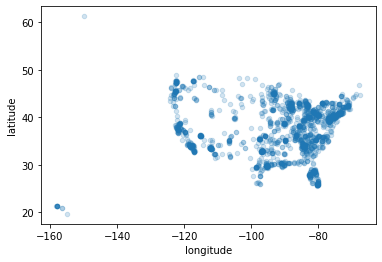

In [59]:
# plot McDoanld's 
df_across.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.show()

From the visualization, we've noticed that the graph form the shape of America, which is great since it means that our data probably represents the McDonald's in the whole America. Also, the distribution of the dots are denser in the west coast and east coast, which follows our common senses that the population in these areas are denser. 

There are several dots outside the mainland of America. We want to know what they are.

In [60]:
# Alaska
df_across[df_across.latitude > 50]['city'].unique()

array(['Anchorage'], dtype=object)

After googling, we know that Anchorage is the largest city in Alaska

In [61]:
# Hawaii and Alaska
df_across[df_across.longitude < -140]['city'].unique()

array(['Honolulu', 'Anchorage', 'Makawao', 'Waianae', 'Kahului', 'Hilo'],
      dtype=object)

We find that ths one dot top above is Alaska, and the several dots bellow is Hawaii islands. We decide to keep these data in our dataframe, since they may represent the relationship between population and number of McDonald's too.

We also notice that the province is in acronym. In order to join the dataframe with other dataframes later, we add a column of the full names of the states.

In [62]:
# Data cleaning
df_across_2 = df_across[['province', 'city']]
df_across_2['city'] = 1
df_across_sum = df_across_2.groupby('province').sum()
df_across_sum = df_across_sum.rename(index=str, columns={"province": "Ac"})
df_across_sum.index.names = ['Ac']
df_across_sum = df_across_sum.rename(index=str, columns={"city": "Count"})

/Users/stevenwu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now we load the population dataset . It seems that this dataset doesn't have any missing value.

In [39]:
# Read and clean Population
population = pd.read_csv('Population.csv')
population.head()

,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,1,Alabama,4887871,3798031,77.7
1,2,Alaska,737438,553622,75.1
2,4,Arizona,7171646,5528989,77.1
3,5,Arkansas,3013825,2310645,76.7
4,6,California,39557045,30567090,77.3


We drop the unnecessary columns and rename the titles. Also, we add a list of acronyms for each state.

In [40]:
# Read us states and acronyms table
us_states_list = pd.read_csv('50_us_states.csv')
us_states_list = us_states_list.drop(columns=['State_upper', 'Ac2'])
states = us_states_list.Ac

In [41]:
population = population.drop(columns=['STATE', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS'])
population = population.rename(index=str, columns={"NAME": "State", "POPESTIMATE2018":"Population"})
population = pd.merge(population, us_states_list, on='State')
population.head()

,State,Population,Ac
0,Alabama,4887871,AL
1,Alaska,737438,AK
2,Arizona,7171646,AZ
3,Arkansas,3013825,AR
4,California,39557045,CA


We combine the McDonald's distribution dataframe with Population dataframe. In this table, Count represents how many McDonald's are in that state according to our data.

In [42]:
# Combine two tables and plot the graph
summary_table = pd.merge(population, df_across_sum, on='Ac')
summary_table.head()

,State,Population,Ac,Count
0,Alaska,737438,AK,1
1,Arizona,7171646,AZ,58
2,Arkansas,3013825,AR,18
3,California,39557045,CA,155
4,Colorado,5695564,CO,7


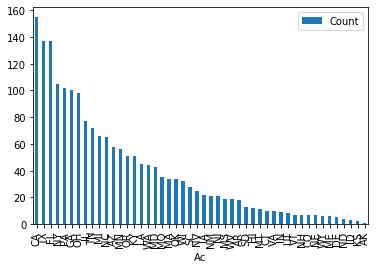

In [79]:
summary_table[['Ac', 'Count']].sort_values('Count', ascending=False).plot.bar('Ac')

We can see that California has the most McDonald's, and Alaska has the least McDonald's

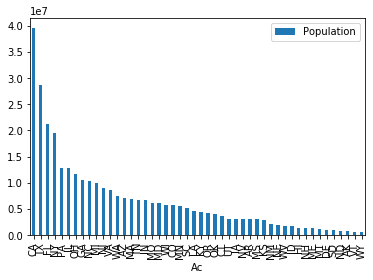

In [81]:
summary_table[['Ac', 'Population']].sort_values('Population', ascending=False).plot.bar('Ac')

We can see that CA has the most population, and WY has the least.

Finally, sine we also want to test our hypothesis that at the places where McDonald's open more restaurants, consumer's ratings are higher. Hence, we load out yelp data into dataframe.

In [43]:
# read yelp data
df_yelp = pd.read_csv('yelp_business.csv')
df_yelp.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


We remove the null data and remove the quotation marks in our data

In [44]:
df_yelp = df_yelp.dropna()

In [45]:
# remove quotation mark
df_yelp['name'] = df_yelp['name'].str.replace('"', '')

We take the McDonald's data from them

In [46]:
# take McDonald's data
df_MD_rate = df_yelp[(df_yelp.name == "McDonald's")]

We've noticed that the data is worldwide. This is not in our expectations, since we believed that Yelp is an American compnay and only contains American data. Hence, we want to select US data from them.

In [54]:
# slect us data from rating
us_df_MD__rate = df_MD_rate[df_MD_rate['state'].isin(states)]

We plot each McDonald's in our data to take a look. It seems like our data has some problem. We're going to discuss it in our data analysis part

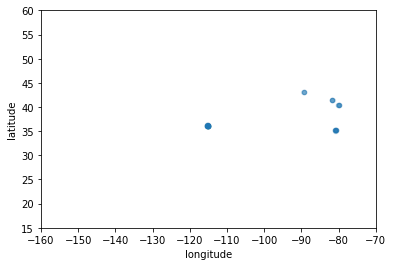

In [63]:
# plot US rating data
us_df_MD__rate.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, xlim=[-160, -70], ylim=[15, 60])
plt.show()

# Data Cleaning Summary

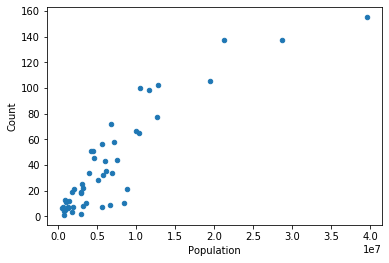

In [50]:
summary_table.plot.scatter('Population', 'Count')

In [51]:
outcome_1, predictors_1 = patsy.dmatrices('Count ~ Population',summary_table)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [52]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           3.36e-17
Time:                        14:25:20   Log-Likelihood:                -206.90
No. Observations:                  48   AIC:                             417.8
Df Residuals:                      46   BIC:                             421.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0041      3.579      2.237      0.0

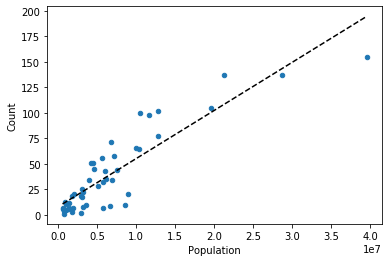

In [53]:
# plot the regression line
summary_table.plot.scatter('Population', 'Count')
slope = 4.723e-06
intercept = 8.0041
xs = np.arange(summary_table['Population'].min(), summary_table['Population'].max())
ys = slope * xs + intercept
plt.plot(xs, ys, '--k')

In [49]:
# Missing states in the data
us_df_MD__rate.groupby('state').sum()

,latitude,longitude,stars,review_count,is_open
state,,,,,
NC,774.252692,-1778.077888,45.5,247,21
NV,2529.160391,-8063.086186,149.0,2195,65
OH,456.250705,-898.517153,20.5,73,9
PA,525.727635,-1039.851771,26.0,145,13
WI,387.827320,-804.250640,16.5,69,8
